<h1 align="center"> Лабораторная работа №3 </h1>

---

<h1 align="center"> Университет ИТМО </h1>
<h2 align="center"> Факультет систем управления и робототехники </h2>

---

### Выполнили:
- **Соколов Никита**  
- **Минеев Кирилл**
- **Соловьев Дмитрий**
- **Семёнов Евгений**

---

### Проверил:
- **Догадин Егор Витальевич**

---

### 4 ноября 2024 г.

---

# Подготовка.

### Установка необходимых библиотек:

In [3]:
!pip install numpy matplotlib sympy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [5]:
t = symbols('t', real=True)

In [6]:
def print_data(eigen_data):
    for i, (eigenvalue, multiplicity, eigenvectors) in enumerate(eigen_data, start=1):
        print(f"Собственный вектор при собственном значении {eigenvalue}")
        for vector in eigenvectors:
            display(vector)

# Задание 1. Непрерывные системы

### Два неколлинеарных вектора $v_1$ и $v_2$ $\in \mathbb{R}^2$

In [7]:
v1, v2 = Matrix([1, 1]), Matrix([-2, 1])

### 1. Система асимптотически устойчива, при этом если $x(0) = v_1$, то $x(t) ∈ Span\{v_1\}$, а если $x(0) = v_2$, то $x(t) \in Span\{v_2\}$ при всех $t ≥ 0$.

In [8]:
A1 = Matrix([[-5, -4], [-2, -7]])
A1

Matrix([
[-5, -4],
[-2, -7]])

In [9]:
x = exp(A1 * t) * v1
x

Matrix([
[exp(-9*t)],
[exp(-9*t)]])

In [10]:
x = exp(A1 * t) * v2
x

Matrix([
[-2*exp(-3*t)],
[   exp(-3*t)]])

In [11]:
data = A1.eigenvects()
print_data(data)

Собственный вектор при собственном значении -9


Matrix([
[1],
[1]])

Собственный вектор при собственном значении -3


Matrix([
[-2],
[ 1]])

### 2. Система неустойчива, при этом у матрицы $A$ не существует двух неколлинеарных собственных векторов.

In [12]:
A2 = Matrix([[1, 1], [0, 1]])
A2

Matrix([
[1, 1],
[0, 1]])

In [13]:
x = exp(A2 * t) * v2
x

Matrix([
[t*exp(t) - 2*exp(t)],
[             exp(t)]])

In [14]:
data = A2.eigenvects()
print_data(data)

Собственный вектор при собственном значении 1


Matrix([
[1],
[0]])

### 3. Система неустойчива, при этом если $x(0) = v_1$, то $\lim_{t \to \infty} x(t) = 0$

In [15]:
A3 = Matrix([[-1, -8], [-4, -5]])
A3

Matrix([
[-1, -8],
[-4, -5]])

In [16]:
x = exp(A3 * t) * v1
x

Matrix([
[exp(-9*t)],
[exp(-9*t)]])

Собственные числа и соответствующие им собственные векторы

In [17]:
data = A3.eigenvects()
print_data(data)

Собственный вектор при собственном значении -9


Matrix([
[1],
[1]])

Собственный вектор при собственном значении 3


Matrix([
[-2],
[ 1]])

### 4. Система асимптотически устойчива, при этом матрица $A \in \mathbb{R}^{2 \times 2}$ имеет комплексные собственные вектора вида $v_1 \pm v_2 \cdot i \in \mathbb{C}^2$

In [18]:
A4 = Matrix([[-7, -5], [2, -5]]) / 3
A4

Matrix([
[-7/3, -5/3],
[ 2/3, -5/3]])

Собственные числа и соответствующие им собственные векторы

In [104]:
data = A4.eigenvects()
print_data(data)

Собственный вектор при собственном значении sqrt(2)/2 - sqrt(2)*I/2


Matrix([
[1 - sqrt(2)*(sqrt(2)/2 - sqrt(2)*I/2)],
[                                    1]])

Собственный вектор при собственном значении sqrt(2)/2 + sqrt(2)*I/2


Matrix([
[1 - sqrt(2)*(sqrt(2)/2 + sqrt(2)*I/2)],
[                                    1]])

### 5. Система неустойчива, при этом матрица $A$ имеет такие же собственные вектора, как в предыдущем пункте.

In [20]:
A5 = Matrix([[5, -5], [2, 7]]) / 3
A5

Matrix([
[5/3, -5/3],
[2/3,  7/3]])

In [105]:
data = A5.eigenvects()
print_data(data)

Собственный вектор при собственном значении 1


Matrix([
[1],
[0]])

### 6. Система не является асимптотически устойчивой, но не является и неустойчивой, при этом матрица $A$ имеет собственные вектора такие же, как в пункте 4.

In [22]:
A6 = Matrix([[-1, -5], [2, 1]]) / 3
A6

Matrix([
[-1/3, -5/3],
[ 2/3,  1/3]])

In [106]:
data = A6.eigenvects()
print_data(data)

Собственный вектор при собственном значении -0.300000000000000


Matrix([
[1.0],
[  0]])

Собственный вектор при собственном значении -0.300000000000000


Matrix([
[                 1.0],
[2.46519032881566e-32]])

# Задание 2. Непрерывные системы. Графики

Начальные условия

In [24]:
x01 = Matrix([[2], [3]])
x02 = Matrix([[-1], [4]])
x03 = Matrix([[3], [-1]])

1. Система асимптотически устойчива

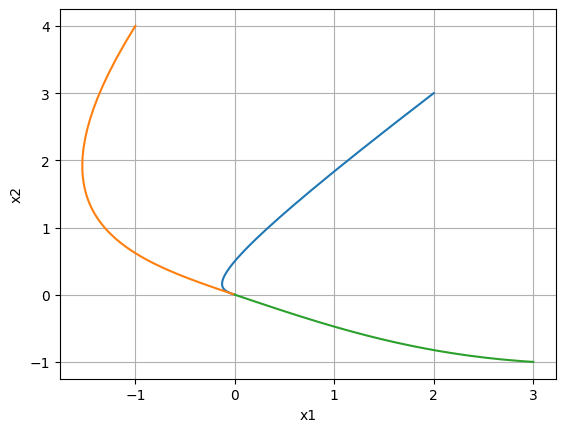

In [25]:
x1 = exp(A1 * t) * x01
x2 = exp(A1 * t) * x02
x3 = exp(A1 * t) * x03

t_vals = np.linspace(0, 10, 1000)

X1, X2, X3, Y1, Y2, Y3 = [], [], [], [], [], []
for t_val in t_vals:
    X1.append(N(x1[0].subs(t, t_val)))
    Y1.append(N(x1[1].subs(t, t_val)))
    X2.append(N(x2[0].subs(t, t_val)))
    Y2.append(N(x2[1].subs(t, t_val)))
    X3.append(N(x3[0].subs(t, t_val)))
    Y3.append(N(x3[1].subs(t, t_val)))
plt.plot(X1, Y1)
plt.plot(X2, Y2)
plt.plot(X3, Y3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)

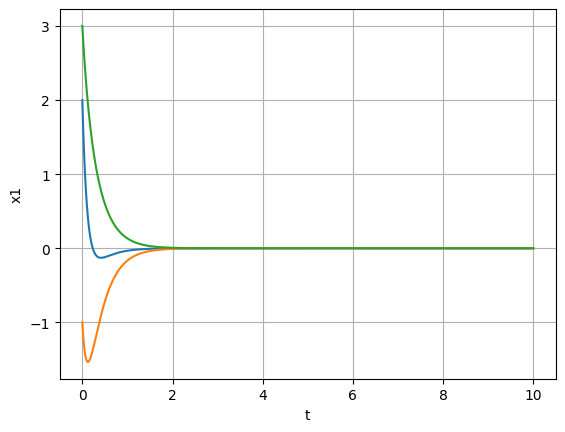

In [26]:
plt.plot(t_vals, X1)
plt.plot(t_vals, X2)
plt.plot(t_vals, X3)
plt.xlabel('t')
plt.ylabel('x1')
plt.grid(True)

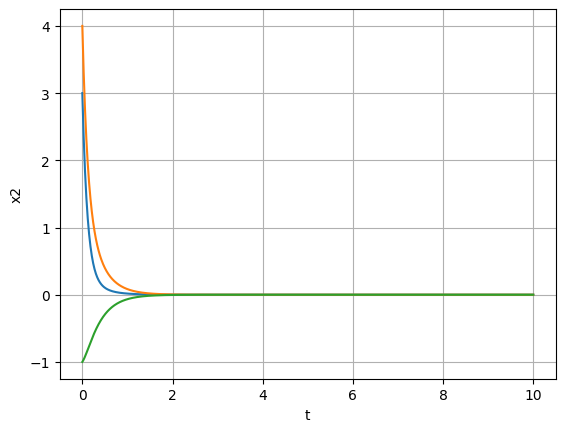

In [27]:
plt.plot(t_vals, Y1)
plt.plot(t_vals, Y2)
plt.plot(t_vals, Y3)
plt.xlabel('t')
plt.ylabel('x2')
plt.grid(True)

2. Система неустойчива

In [28]:
x1 = exp(A2 * t) * x01
x2 = exp(A2 * t) * x02
x3 = exp(A2 * t) * x03

t_vals = np.linspace(0, 10, 1000)

X1, X2, X3, Y1, Y2, Y3 = [], [], [], [], [], []
for t_val in t_vals:
    X1.append(N(x1[0].subs(t, t_val)))
    Y1.append(N(x1[1].subs(t, t_val)))
    X2.append(N(x2[0].subs(t, t_val)))
    Y2.append(N(x2[1].subs(t, t_val)))
    X3.append(N(x3[0].subs(t, t_val)))
    Y3.append(N(x3[1].subs(t, t_val)))

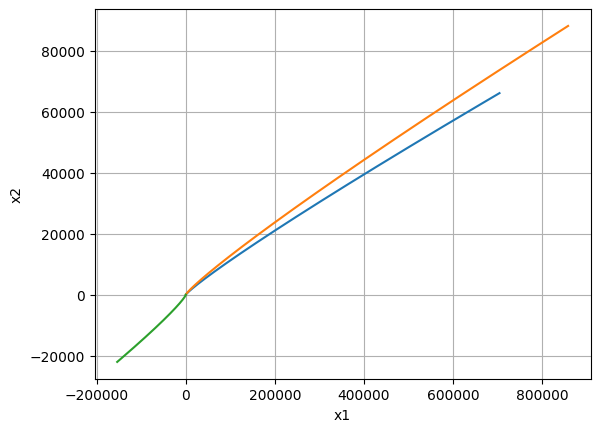

In [29]:
plt.plot(X1, Y1)
plt.plot(X2, Y2)
plt.plot(X3, Y3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)

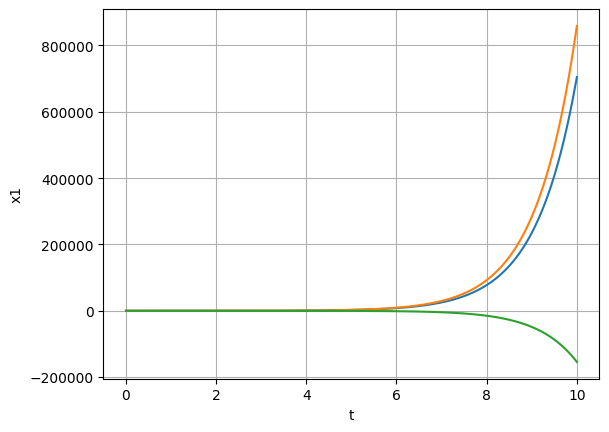

In [30]:
plt.plot(t_vals, X1)
plt.plot(t_vals, X2)
plt.plot(t_vals, X3)
plt.xlabel('t')
plt.ylabel('x1')
plt.grid(True)

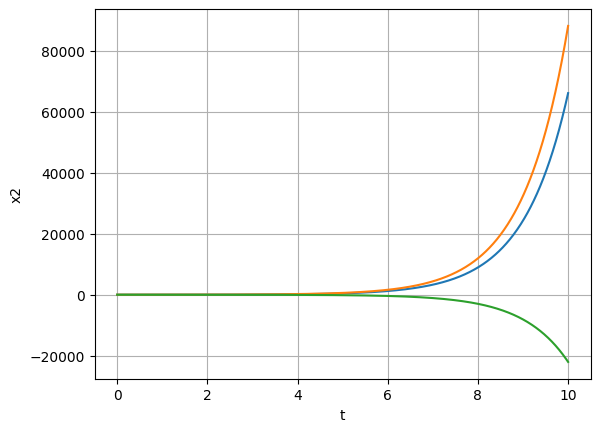

In [31]:
plt.plot(t_vals, Y1)
plt.plot(t_vals, Y2)
plt.plot(t_vals, Y3)
plt.xlabel('t')
plt.ylabel('x2')
plt.grid(True)

3. Система неустойчива

In [32]:
x1 = exp(A3 * t) * x01
x2 = exp(A3 * t) * x02
x3 = exp(A3 * t) * x03

t_vals = np.linspace(0, 10, 1000)

X1, X2, X3, Y1, Y2, Y3 = [], [], [], [], [], []
for t_val in t_vals:
    X1.append(N(x1[0].subs(t, t_val)))
    Y1.append(N(x1[1].subs(t, t_val)))
    X2.append(N(x2[0].subs(t, t_val)))
    Y2.append(N(x2[1].subs(t, t_val)))
    X3.append(N(x3[0].subs(t, t_val)))
    Y3.append(N(x3[1].subs(t, t_val)))

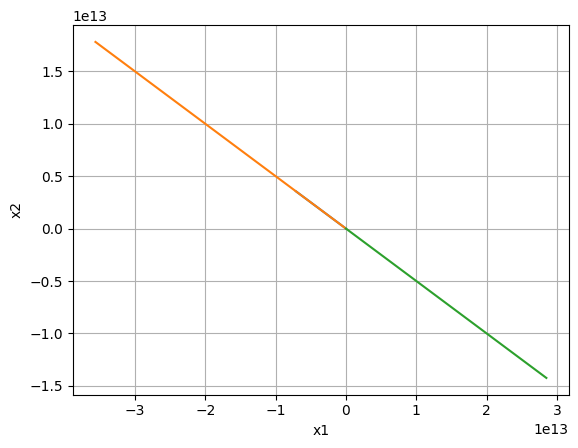

In [33]:
plt.plot(X1, Y1)
plt.plot(X2, Y2)
plt.plot(X3, Y3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)

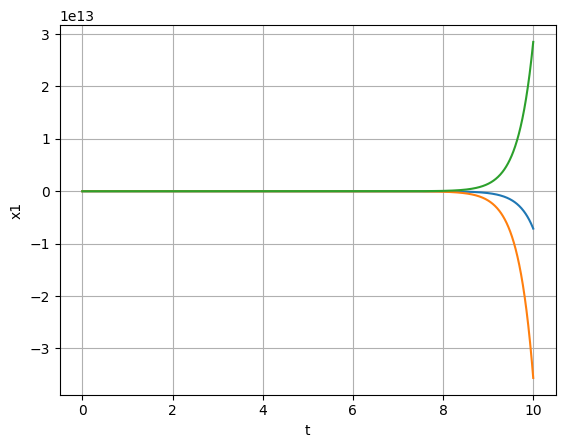

In [34]:
plt.plot(t_vals, X1)
plt.plot(t_vals, X2)
plt.plot(t_vals, X3)
plt.xlabel('t')
plt.ylabel('x1')
plt.grid(True)

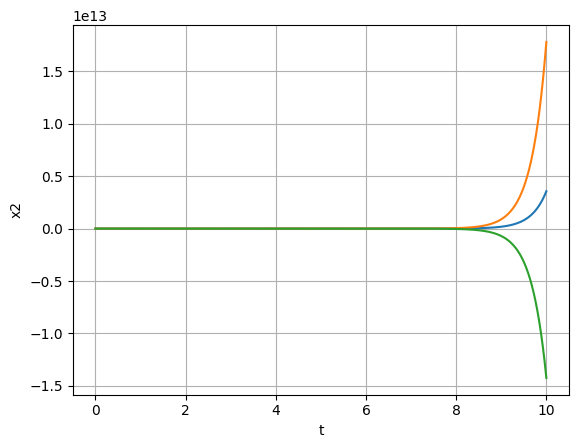

In [35]:
plt.plot(t_vals, Y1)
plt.plot(t_vals, Y2)
plt.plot(t_vals, Y3)
plt.xlabel('t')
plt.ylabel('x2')
plt.grid(True)

4. Система асимптотически устойчива

In [36]:
x1 = exp(A4 * t) * x01
x2 = exp(A4 * t) * x02
x3 = exp(A4 * t) * x03

t_vals = np.linspace(0, 10, 1000)

X1, X2, X3, Y1, Y2, Y3 = [], [], [], [], [], []
for t_val in t_vals:
    X1.append(N(x1[0].subs(t, t_val)))
    Y1.append(N(x1[1].subs(t, t_val)))
    X2.append(N(x2[0].subs(t, t_val)))
    Y2.append(N(x2[1].subs(t, t_val)))
    X3.append(N(x3[0].subs(t, t_val)))
    Y3.append(N(x3[1].subs(t, t_val)))

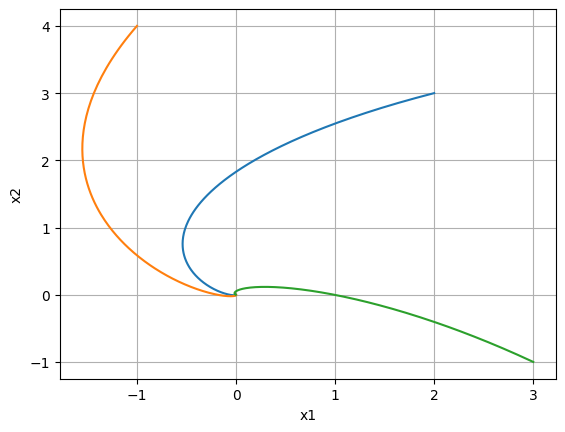

In [37]:
plt.plot(X1, Y1)
plt.plot(X2, Y2)
plt.plot(X3, Y3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)

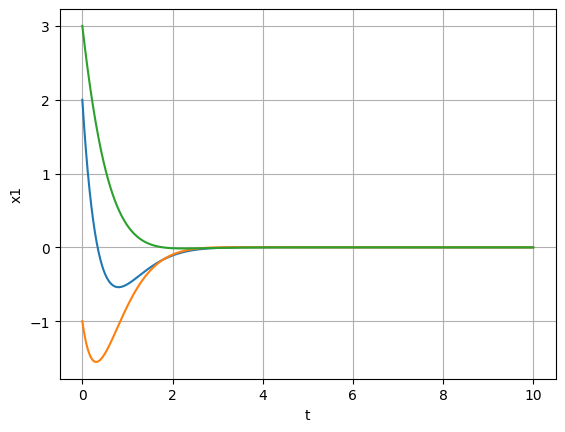

In [38]:
plt.plot(t_vals, X1)
plt.plot(t_vals, X2)
plt.plot(t_vals, X3)
plt.xlabel('t')
plt.ylabel('x1')
plt.grid(True)

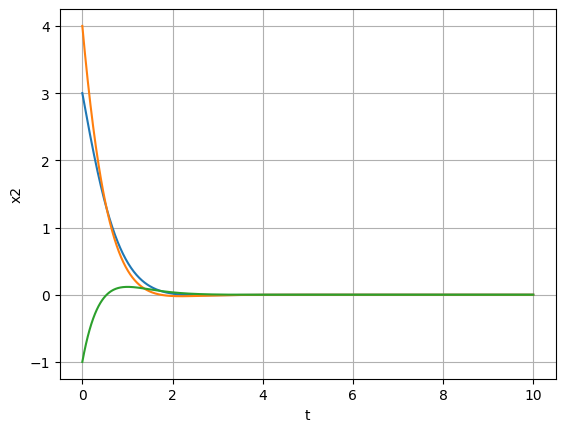

In [39]:
plt.plot(t_vals, Y1)
plt.plot(t_vals, Y2)
plt.plot(t_vals, Y3)
plt.xlabel('t')
plt.ylabel('x2')
plt.grid(True)

5. Система неустойчива

In [40]:
x1 = exp(A5 * t) * x01
x2 = exp(A5 * t) * x02
x3 = exp(A5 * t) * x03

t_vals = np.linspace(0, 10, 1000)

X1, X2, X3, Y1, Y2, Y3 = [], [], [], [], [], []
for t_val in t_vals:
    X1.append(N(x1[0].subs(t, t_val)))
    Y1.append(N(x1[1].subs(t, t_val)))
    X2.append(N(x2[0].subs(t, t_val)))
    Y2.append(N(x2[1].subs(t, t_val)))
    X3.append(N(x3[0].subs(t, t_val)))
    Y3.append(N(x3[1].subs(t, t_val)))

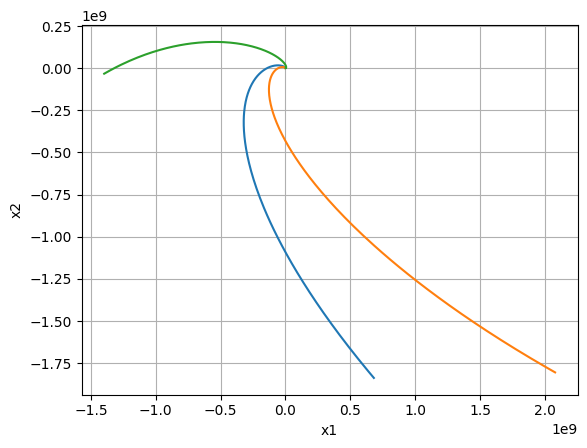

In [41]:
plt.plot(X1, Y1)
plt.plot(X2, Y2)
plt.plot(X3, Y3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)

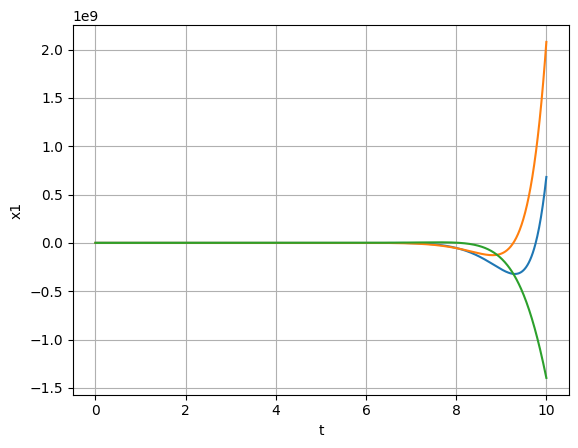

In [42]:
plt.plot(t_vals, X1)
plt.plot(t_vals, X2)
plt.plot(t_vals, X3)
plt.xlabel('t')
plt.ylabel('x1')
plt.grid(True)

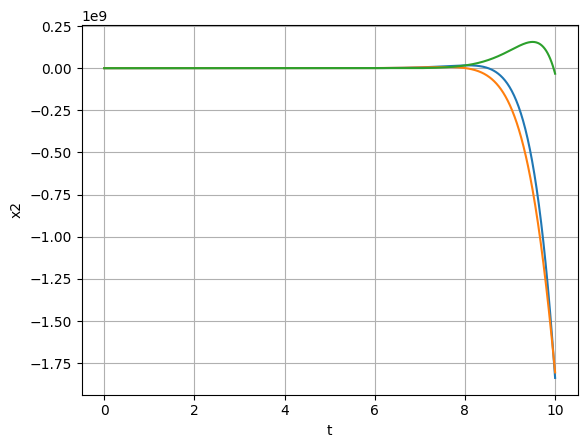

In [43]:
plt.plot(t_vals, Y1)
plt.plot(t_vals, Y2)
plt.plot(t_vals, Y3)
plt.xlabel('t')
plt.ylabel('x2')
plt.grid(True)

6. Система устойчива(но не асимптотически)

In [44]:
x1 = exp(A6 * t) * x01
x2 = exp(A6 * t) * x02
x3 = exp(A6 * t) * x03

t_vals = np.linspace(0, 10, 1000)

X1, X2, X3, Y1, Y2, Y3 = [], [], [], [], [], []
for t_val in t_vals:
    X1.append(N(x1[0].subs(t, t_val)))
    Y1.append(N(x1[1].subs(t, t_val)))
    X2.append(N(x2[0].subs(t, t_val)))
    Y2.append(N(x2[1].subs(t, t_val)))
    X3.append(N(x3[0].subs(t, t_val)))
    Y3.append(N(x3[1].subs(t, t_val)))

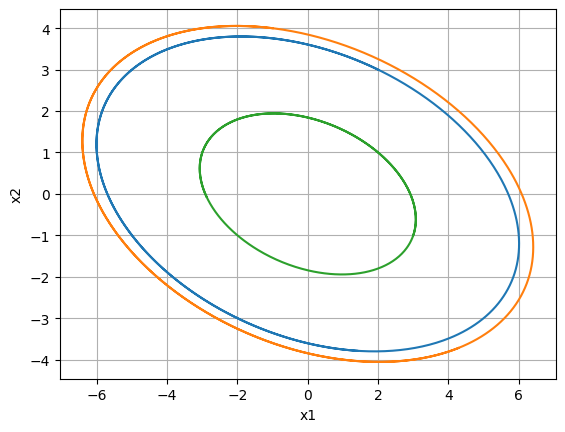

In [45]:
plt.plot(X1, Y1)
plt.plot(X2, Y2)
plt.plot(X3, Y3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)

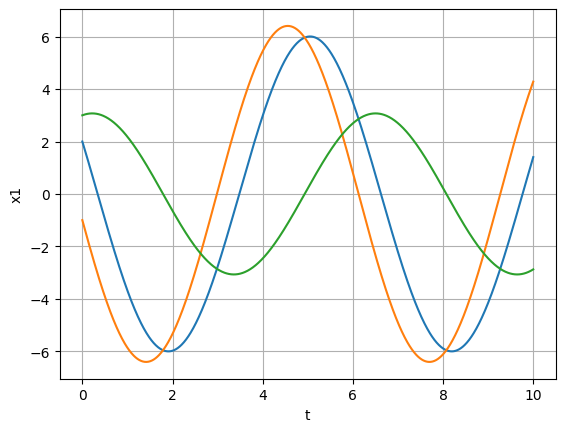

In [46]:
plt.plot(t_vals, X1)
plt.plot(t_vals, X2)
plt.plot(t_vals, X3)
plt.xlabel('t')
plt.ylabel('x1')
plt.grid(True)

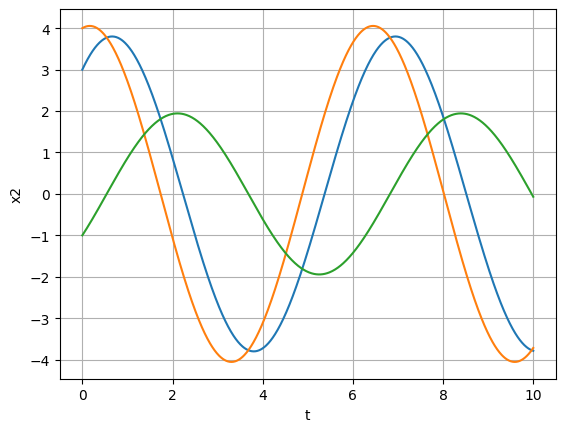

In [47]:
plt.plot(t_vals, Y1)
plt.plot(t_vals, Y2)
plt.plot(t_vals, Y3)
plt.xlabel('t')
plt.ylabel('x2')
plt.grid(True)

# Задание 3. Дискретные системы

In [48]:
A1 = Matrix([[-1, -1], [0, -1]])
A1

Matrix([
[-1, -1],
[ 0, -1]])

Собственные числа и соответствующие им собственные векторы

In [49]:
A1.eigenvects()

[(-1,
  2,
  [Matrix([
   [1],
   [0]])])]

In [50]:
A2 = Matrix([[-1/sqrt(2), 1/sqrt(2)], [-1/sqrt(2), -1/sqrt(2)]])
A2

Matrix([
[-sqrt(2)/2,  sqrt(2)/2],
[-sqrt(2)/2, -sqrt(2)/2]])

Собственные числа и соответствующие им собственные векторы

In [51]:
A2.eigenvects()

[(-sqrt(2)/2 - sqrt(2)*I/2,
  1,
  [Matrix([
   [-1 - sqrt(2)*(-sqrt(2)/2 - sqrt(2)*I/2)],
   [                                      1]])]),
 (-sqrt(2)/2 + sqrt(2)*I/2,
  1,
  [Matrix([
   [-1 - sqrt(2)*(-sqrt(2)/2 + sqrt(2)*I/2)],
   [                                      1]])])]

In [52]:
A3 = Matrix([[0, 1], [-1, 0]])
A3

Matrix([
[ 0, 1],
[-1, 0]])

Собственные числа и соответствующие им собственные векторы

In [53]:
A3.eigenvects()

[(-I,
  1,
  [Matrix([
   [I],
   [1]])]),
 (I,
  1,
  [Matrix([
   [-I],
   [ 1]])])]

In [54]:
A4 = Matrix([[1/sqrt(2), 1/sqrt(2)], [-1/sqrt(2), 1/sqrt(2)]])
A4

Matrix([
[ sqrt(2)/2, sqrt(2)/2],
[-sqrt(2)/2, sqrt(2)/2]])

Собственные числа и соответствующие им собственные векторы

In [55]:
A4.eigenvects()

[(sqrt(2)/2 - sqrt(2)*I/2,
  1,
  [Matrix([
   [1 - sqrt(2)*(sqrt(2)/2 - sqrt(2)*I/2)],
   [                                    1]])]),
 (sqrt(2)/2 + sqrt(2)*I/2,
  1,
  [Matrix([
   [1 - sqrt(2)*(sqrt(2)/2 + sqrt(2)*I/2)],
   [                                    1]])])]

In [56]:
A5 = Matrix([[1, 1], [0, 1]])
A5

Matrix([
[1, 1],
[0, 1]])

Собственные числа и соответствующие им собственные векторы

In [57]:
A5.eigenvects()

[(1,
  2,
  [Matrix([
   [1],
   [0]])])]

In [58]:
c = 0.3

In [59]:
A6 = c * A1
A6

Matrix([
[-0.3, -0.3],
[   0, -0.3]])

Собственные числа и соответствующие им собственные векторы

In [60]:
A6.eigenvects()

[(-0.300000000000000,
  1,
  [Matrix([
   [1.0],
   [  0]])]),
 (-0.300000000000000,
  1,
  [Matrix([
   [                 1.0],
   [2.46519032881566e-32]])])]

In [61]:
A7 = c * A3
A7

Matrix([
[   0, 0.3],
[-0.3,   0]])

Собственные числа и соответствующие им собственные векторы

In [62]:
A7.eigenvects()

[(-0.3*I,
  1,
  [Matrix([
   [-0.707106781186548*I],
   [  -0.707106781186548]])]),
 (0.3*I,
  1,
  [Matrix([
   [  0.707106781186548],
   [0.707106781186548*I]])])]

In [63]:
A8 = c * A5
A8

Matrix([
[0.3, 0.3],
[  0, 0.3]])

Собственные числа и соответствующие им собственные векторы

In [64]:
A8.eigenvects()

[(0.300000000000000,
  1,
  [Matrix([
   [1.0],
   [  0]])]),
 (0.300000000000000,
  1,
  [Matrix([
   [                -1.0],
   [2.46519032881566e-32]])])]

In [65]:
d = 3

In [66]:
A9 = d * A1
A9

Matrix([
[-3, -3],
[ 0, -3]])

Собственные числа и соответствующие им собственные векторы

In [67]:
A9.eigenvects()

[(-3,
  2,
  [Matrix([
   [1],
   [0]])])]

In [68]:
A10 = d * A3
A10

Matrix([
[ 0, 3],
[-3, 0]])

Собственные числа и соответствующие им собственные векторы

In [69]:
A10.eigenvects()

[(-3*I,
  1,
  [Matrix([
   [I],
   [1]])]),
 (3*I,
  1,
  [Matrix([
   [-I],
   [ 1]])])]

In [70]:
A11 = d * A5
A11

Matrix([
[3, 3],
[0, 3]])

Собственные числа и соответствующие им собственные векторы

In [71]:
A11.eigenvects()

[(3,
  2,
  [Matrix([
   [1],
   [0]])])]

In [72]:
A12 = Matrix([[0, 1], [0, 0]])
A12

Matrix([
[0, 1],
[0, 0]])

Собственные числа и соответствующие им собственные векторы

In [73]:
A12.eigenvects()

[(0,
  2,
  [Matrix([
   [1],
   [0]])])]

Cобственные числа на комплексной плоскости

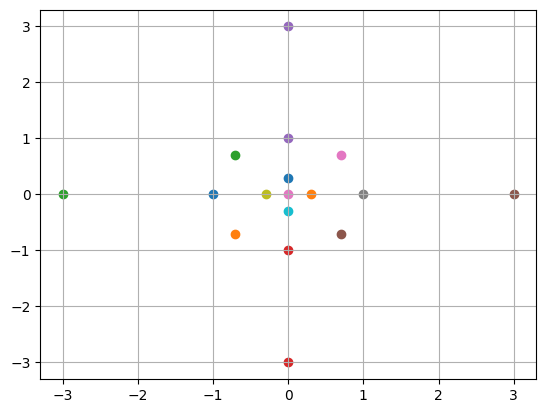

In [74]:
plt.scatter(-1, 0)
plt.scatter(-1/sqrt(2), -1/sqrt(2))
plt.scatter(-1/sqrt(2), 1/sqrt(2))
plt.scatter(0, -1)
plt.scatter(0, 1)
plt.scatter(1/sqrt(2), -1/sqrt(2))
plt.scatter(1/sqrt(2), 1/sqrt(2))
plt.scatter(1, 0)
plt.scatter(-1 * c, 0)
plt.scatter(0, -1 * c)
plt.scatter(0, 1 * c)
plt.scatter(1 * c, 0)
plt.scatter(-1 * d, 0)
plt.scatter(0, -1 * d)
plt.scatter(0, 1 * d)
plt.scatter(1 * d, 0)
plt.scatter(0, 0)
plt.grid(True)

# Задание 4. Дискретные системы. Графики

Начальное условие

In [75]:
x0 = Matrix([[2], [3]])
k_vals = np.arange(25)

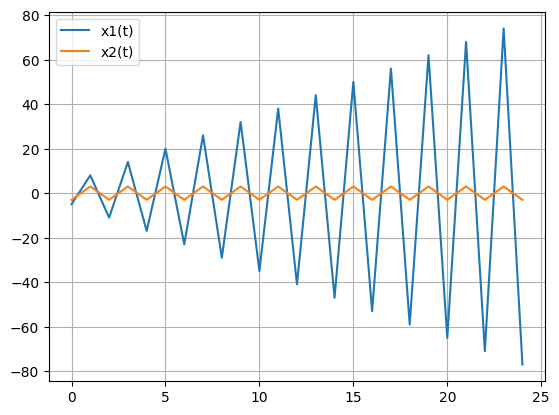

In [76]:
X1, X2 = [], []
x = x0
for k in k_vals:
    x = A1 * x
    X1.append(x[0])
    X2.append(x[1])
plt.plot(k_vals, X1, label='x1(t)')
plt.plot(k_vals, X2, label='x2(t)')
plt.legend()
plt.grid(True)

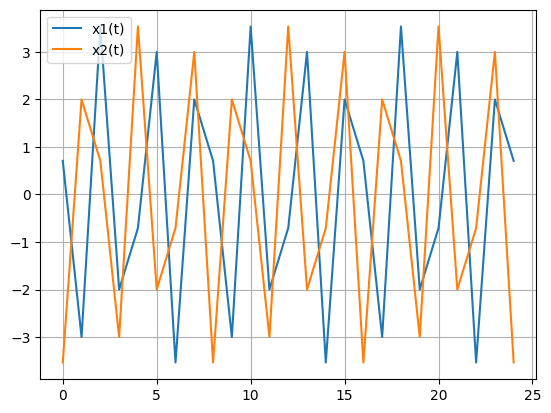

In [77]:
X1, X2 = [], []
x = x0
for k in k_vals:
    x = A2 * x
    X1.append(x[0])
    X2.append(x[1])
plt.plot(k_vals, X1, label='x1(t)')
plt.plot(k_vals, X2, label='x2(t)')
plt.legend()
plt.grid(True)

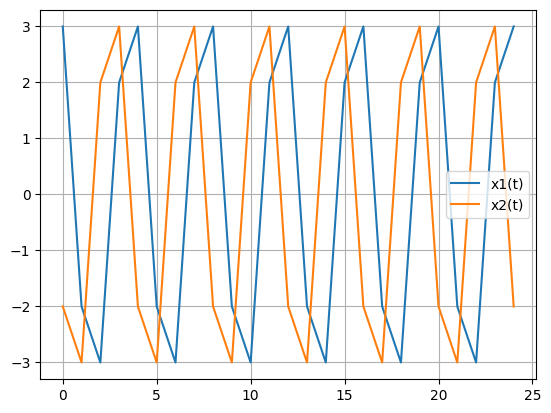

In [78]:
X1, X2 = [], []
x = x0
for k in k_vals:
    x = A3 * x
    X1.append(x[0])
    X2.append(x[1])
plt.plot(k_vals, X1, label='x1(t)')
plt.plot(k_vals, X2, label='x2(t)')
plt.legend()
plt.grid(True)

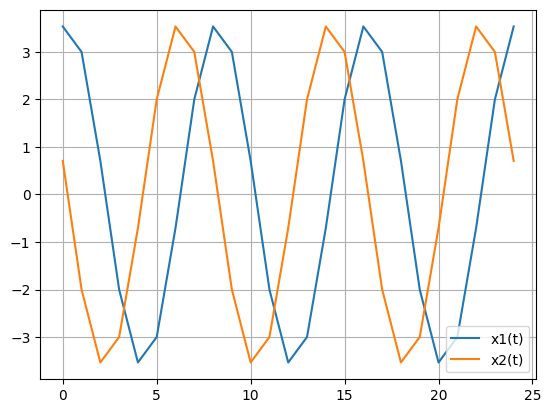

In [79]:
X1, X2 = [], []
x = x0
for k in k_vals:
    x = A4 * x
    X1.append(x[0])
    X2.append(x[1])
plt.plot(k_vals, X1, label='x1(t)')
plt.plot(k_vals, X2, label='x2(t)')
plt.legend()
plt.grid(True)

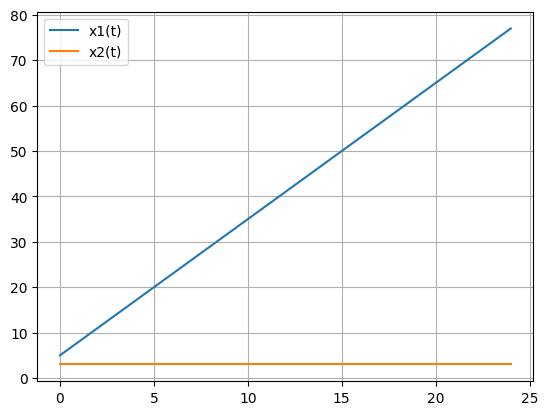

In [80]:
X1, X2 = [], []
x = x0
for k in k_vals:
    x = A5 * x
    X1.append(x[0])
    X2.append(x[1])
plt.plot(k_vals, X1, label='x1(t)')
plt.plot(k_vals, X2, label='x2(t)')
plt.legend()
plt.grid(True)

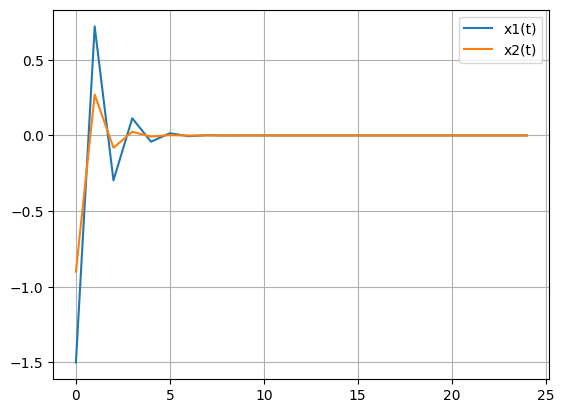

In [81]:
X1, X2 = [], []
x = x0
for k in k_vals:
    x = A6 * x
    X1.append(x[0])
    X2.append(x[1])
plt.plot(k_vals, X1, label='x1(t)')
plt.plot(k_vals, X2, label='x2(t)')
plt.legend()
plt.grid(True)

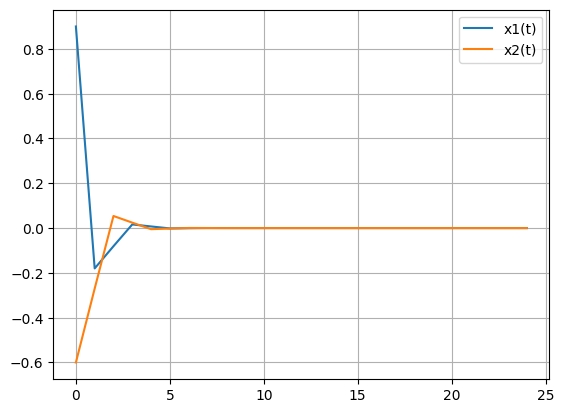

In [82]:
X1, X2 = [], []
x = x0
for k in k_vals:
    x = A7 * x
    X1.append(x[0])
    X2.append(x[1])
plt.plot(k_vals, X1, label='x1(t)')
plt.plot(k_vals, X2, label='x2(t)')
plt.legend()
plt.grid(True)

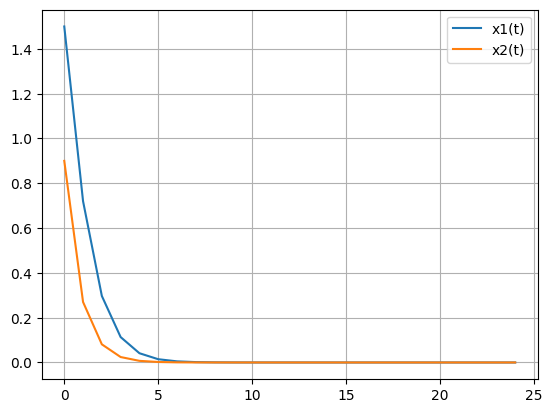

In [83]:
X1, X2 = [], []
x = x0
for k in k_vals:
    x = A8 * x
    X1.append(x[0])
    X2.append(x[1])
plt.plot(k_vals, X1, label='x1(t)')
plt.plot(k_vals, X2, label='x2(t)')
plt.legend()
plt.grid(True)

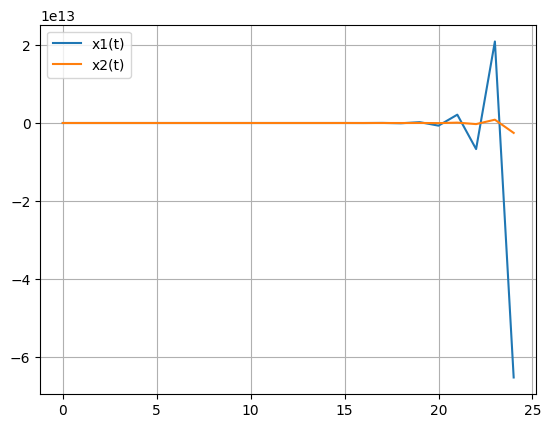

In [84]:
X1, X2 = [], []
x = x0
for k in k_vals:
    x = A9 * x
    X1.append(x[0])
    X2.append(x[1])
plt.plot(k_vals, X1, label='x1(t)')
plt.plot(k_vals, X2, label='x2(t)')
plt.legend()
plt.grid(True)

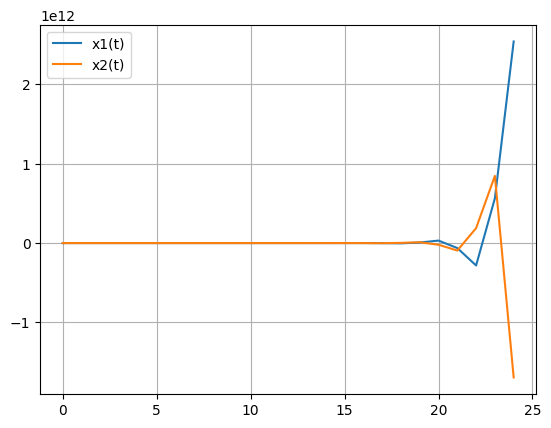

In [85]:
X1, X2 = [], []
x = x0
for k in k_vals:
    x = A10 * x
    X1.append(x[0])
    X2.append(x[1])
plt.plot(k_vals, X1, label='x1(t)')
plt.plot(k_vals, X2, label='x2(t)')
plt.legend()
plt.grid(True)

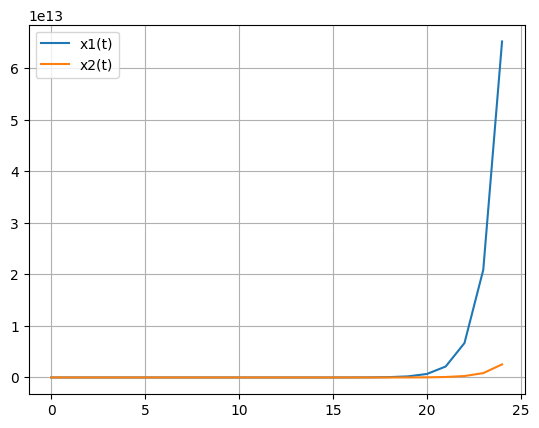

In [86]:
X1, X2 = [], []
x = x0
for k in k_vals:
    x = A11 * x
    X1.append(x[0])
    X2.append(x[1])
plt.plot(k_vals, X1, label='x1(t)')
plt.plot(k_vals, X2, label='x2(t)')
plt.legend()
plt.grid(True)

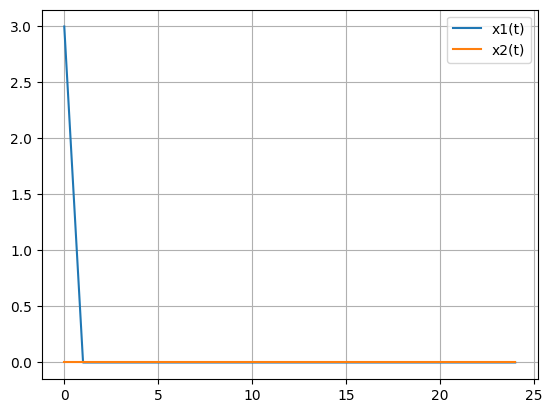

In [87]:
X1, X2 = [], []
x = x0
for k in k_vals:
    x = A12 * x
    X1.append(x[0])
    X2.append(x[1])
plt.plot(k_vals, X1, label='x1(t)')
plt.plot(k_vals, X2, label='x2(t)')
plt.legend()
plt.grid(True)

# Задание 5. Осциллятор?

1.  a < 0, b = 0

In [88]:
a = -2
b = 0

In [89]:
A = Matrix([[0, 1], [a, b]])
A

Matrix([
[ 0, 1],
[-2, 0]])

In [90]:
x0 = Matrix([[-2], [1]])
x = exp(A * t) * x0
x

Matrix([
[sqrt(2)*sin(sqrt(2)*t)/2 - 2*cos(sqrt(2)*t)],
[  2*sqrt(2)*sin(sqrt(2)*t) + cos(sqrt(2)*t)]])

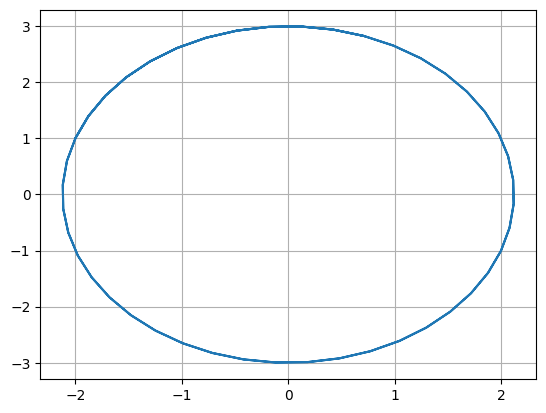

In [91]:
t_vals = np.linspace(0, 10, 100)

X1, X2 = [], []
for t_val in t_vals:
    x1 = x[0].subs(t, t_val)
    x2 = x[1].subs(t, t_val)
    X1.append(x1)
    X2.append(x2)

plt.plot(X1, X2)
plt.grid(True)

2. a < 0, b < 0

In [92]:
a = -2
b = -3

In [93]:
A = Matrix([[0, 1], [a, b]])
A

Matrix([
[ 0,  1],
[-2, -3]])

In [94]:
x0 = Matrix([[-2], [1]])
x = exp(A * t) * x0
x

Matrix([
[ -3*exp(-t) + exp(-2*t)],
[3*exp(-t) - 2*exp(-2*t)]])

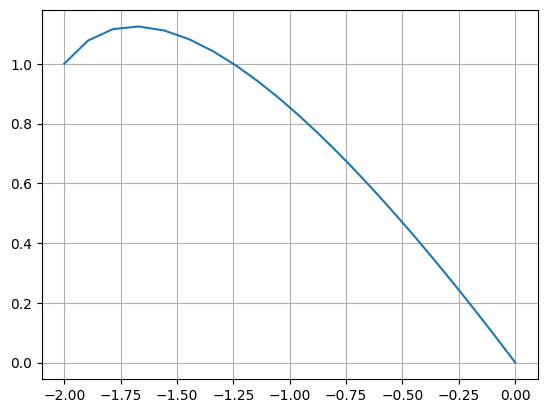

In [95]:
t_vals = np.linspace(0, 10, 100)

X1, X2 = [], []
for t_val in t_vals:
    x1 = x[0].subs(t, t_val)
    x2 = x[1].subs(t, t_val)
    X1.append(x1)
    X2.append(x2)

plt.plot(X1, X2)
plt.grid(True)

3. a > 0, b = 0

In [96]:
a = 4
b = 0

In [97]:
A = Matrix([[0, 1], [a, b]])
A

Matrix([
[0, 1],
[4, 0]])

In [98]:
x0 = Matrix([[-2], [1]])
x = exp(A * t) * x0
x

Matrix([
[-3*exp(2*t)/4 - 5*exp(-2*t)/4],
[-3*exp(2*t)/2 + 5*exp(-2*t)/2]])

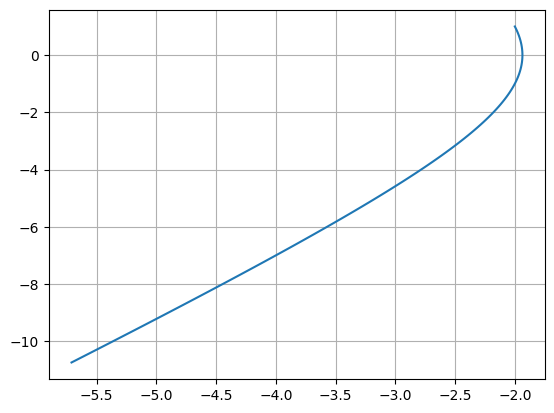

In [99]:
t_vals = np.linspace(0, 1, 100)

X1, X2 = [], []
for t_val in t_vals:
    x1 = x[0].subs(t, t_val)
    x2 = x[1].subs(t, t_val)
    X1.append(x1)
    X2.append(x2)

plt.plot(X1, X2)
plt.grid(True)

4.a > 0, b < 0

In [100]:
a = 4
b = -1

In [101]:
A = Matrix([[0, 1], [a, b]])
A

Matrix([
[0,  1],
[4, -1]])

In [102]:
x0 = Matrix([[-2], [1]])
x = exp(A * t) * x0
x

Matrix([
[-2*(4*sqrt(17) + 68)*exp(t*(-1/2 + sqrt(17)/2))/((-1/2 + sqrt(17)/2)*(17 + 17*sqrt(17))) + (1/2 - sqrt(17)/34)*exp(t*(-1/2 + sqrt(17)/2))/(-1/2 + sqrt(17)/2) + 8*sqrt(17)*exp(t*(-sqrt(17)/2 - 1/2))/(17*(-sqrt(17)/2 - 1/2)) + 8*sqrt(17)*exp(t*(-sqrt(17)/2 - 1/2))/((-17 + 17*sqrt(17))*(-sqrt(17)/2 - 1/2))],
[                                                                                      -2*(4*sqrt(17) + 68)*exp(t*(-1/2 + sqrt(17)/2))/(17 + 17*sqrt(17)) + (1/2 - sqrt(17)/34)*exp(t*(-1/2 + sqrt(17)/2)) + 8*sqrt(17)*exp(t*(-sqrt(17)/2 - 1/2))/(-17 + 17*sqrt(17)) + 8*sqrt(17)*exp(t*(-sqrt(17)/2 - 1/2))/17]])

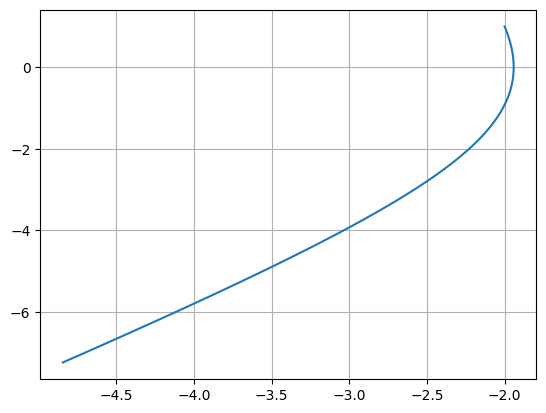

In [103]:
t_vals = np.linspace(0, 1, 100)

X1, X2 = [], []
for t_val in t_vals:
    x1 = x[0].subs(t, t_val)
    x2 = x[1].subs(t, t_val)
    X1.append(x1)
    X2.append(x2)

plt.plot(X1, X2)
plt.grid(True)